<a href="https://colab.research.google.com/github/missmediocris/missmediocris/blob/main/Handwritten_Digit_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUBMITTED BY NIMRA IMTIAZ**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify the path to the zip file
zip_path = '/content/drive/MyDrive/Colab Notebooks/digit-recognizer.zip'

# Specify the target directory for extraction
extraction_path = '/content/extracted/'

# Unzip the file
!unzip "{zip_path}" -d "{extraction_path}"

Archive:  /content/drive/MyDrive/Colab Notebooks/digit-recognizer.zip
  inflating: /content/extracted/sample_submission.csv  
  inflating: /content/extracted/test.csv  
  inflating: /content/extracted/train.csv  


**DATA EXPLORATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D ,BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , LearningRateScheduler, EarlyStopping, ModelCheckpoint


sns.set(style='white', context='notebook', palette='deep') # seaborn style

In [ ]:
 #loding the data pathes
train =pd.read_csv("/content/extracted/train.csv")
test  =pd.read_csv("/content/extracted/test.csv")
print ("the shape of train data is " , train.shape )
print ("the shape of test data is " , test.shape )

the shape of train data is  (42000, 785)
the shape of test data is  (28000, 784)


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**DATA PREPROCESSING**

In [ ]:
train.isnull().sum()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
X_train=train.drop(labels = ["label"],axis = 1)
y_train=train['label']
# we will delete train df after this becous it tacke 251.5 MB from memory
del train

In [ ]:
print(X_train)
print(y_train)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [ ]:
print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)

shape of X_train (42000, 784)
shape of y_train (42000,)


In [ ]:
# know the number of image in each calss
df=y_train.value_counts().reset_index()
df

,index,label
0,1,4684
1,7,4401
2,3,4351
3,9,4188
4,2,4177
5,6,4137
6,0,4132
7,4,4072
8,8,4063
9,5,3795


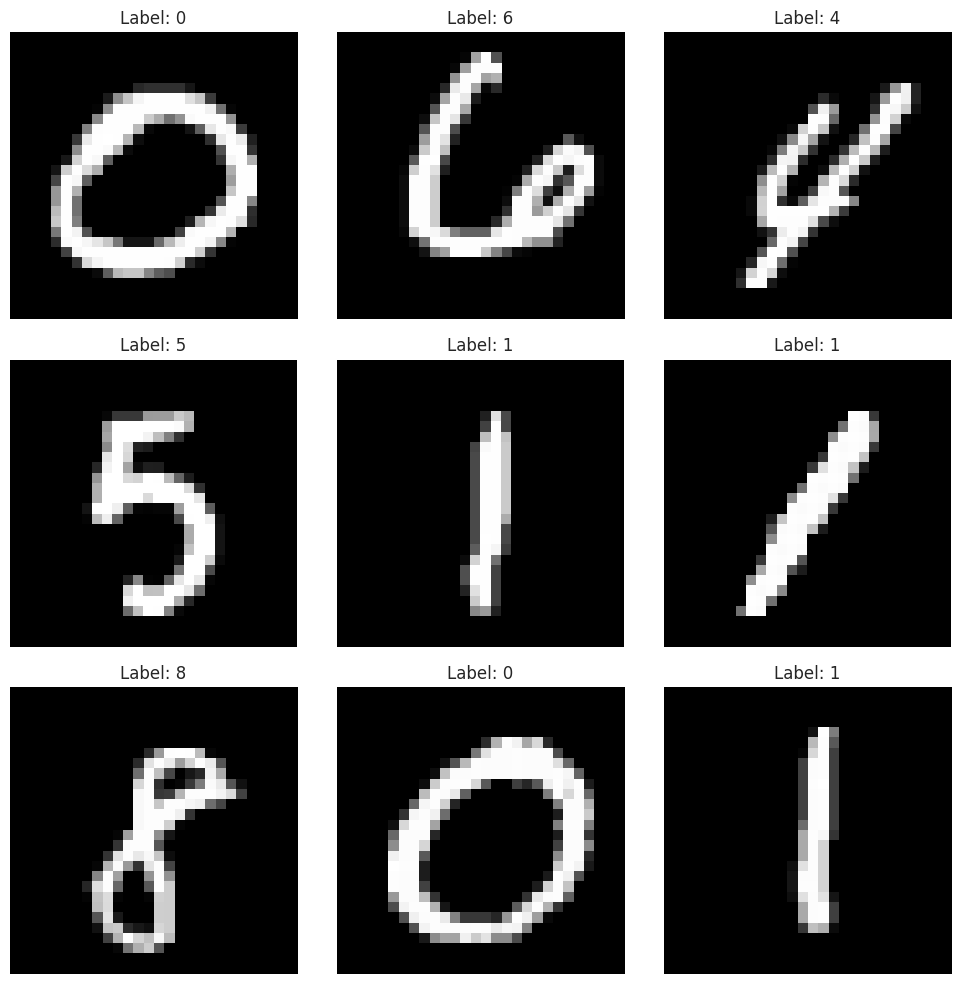

In [ ]:
import random

# Define the number of rows and columns for the grid
rows = 3
cols = 3

# Create a figure and axis object
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
X = X_train
y = y_train

# Loop through the rows and columns to plot images
for i in range(1, cols * rows + 1):
    sample = random.randint(0, len(X) - 1)
    label = str(int(y[sample]))
    img = X.values[sample].reshape(28, 28)
    ax = axes[(i - 1) // cols, (i - 1) % cols]  # Corrected indices
    ax.imshow(img, cmap='gray')
    ax.set_title('Label: ' + label)
    ax.axis('off')

plt.tight_layout()
plt.show()



**NORMALIZATION**

In [ ]:
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,10)

**ENCODING THE LABELS**

In [ ]:
# encoding the labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)

**SPLIT THE DATA TO TRAIN & VALIDATION SETS**

In [ ]:
from sklearn.model_selection import train_test_split

# Reduce the size of y_train to match the size of X_train
y_train = y_train[:len(X_train)]

# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


**MODELLING**

In [ ]:
from keras.utils import to_categorical

# Convert target labels to one-hot encoded format
Y_train_one_hot = to_categorical(y_train, num_classes=10)
Y_val_one_hot = to_categorical(y_val, num_classes=10)

# Print the shapes to verify
print(Y_train_one_hot.shape)
print(Y_val_one_hot.shape)

(33600, 10, 10)
(8400, 10, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.utils import to_categorical

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
import tensorflow as tf
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return float(learning_rate * tf.math.exp(-0.1))

reduce_lr = LearningRateScheduler(scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,verbose=3,min_lr=0.00000001)
early_stop = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

**COMPILE THE MODEL**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 ),metrics = ['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,          # Random rotation between 0 and 10 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,     # Randomly shift images vertically (fraction of total height)
    zoom_range=0.1,             # Randomly zoom in/out on images
    horizontal_flip=False,      # Randomly flip images horizontally
    vertical_flip=False,        # Randomly flip images vertically
)

datagen.fit(X_train)

**TRAIN THE MODEL**

In [ ]:
hist=model.fit(datagen.flow(X_train, y_train, batch_size=32),
                epochs=30, validation_data=(X_val, y_val),
                callbacks=[reduce_lr,early_stop],verbose=1,steps_per_epoch = X_train.shape[0]//500)

Epoch 1/30
67/67 [==============================] - 40s 575ms/step - loss: 2.1746 - accuracy: 0.1968 - val_loss: 1.1192 - val_accuracy: 0.6146 - lr: 0.0010
Epoch 2/30
67/67 [==============================] - 39s 590ms/step - loss: 0.9807 - accuracy: 0.6814 - val_loss: 0.2670 - val_accuracy: 0.9261 - lr: 0.0010
Epoch 3/30
67/67 [==============================] - 38s 567ms/step - loss: 0.5754 - accuracy: 0.8260 - val_loss: 0.1948 - val_accuracy: 0.9452 - lr: 0.0010
Epoch 4/30
67/67 [==============================] - 38s 566ms/step - loss: 0.3915 - accuracy: 0.8801 - val_loss: 0.1450 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 5/30
67/67 [==============================] - 33s 504ms/step - loss: 0.3140 - accuracy: 0.9049 - val_loss: 0.1376 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 6/30
67/67 [==============================] - 33s 499ms/step - loss: 0.2923 - accuracy: 0.9086 - val_loss: 0.1143 - val_accuracy: 0.9661 - lr: 0.0010
Epoch 7/30
67/67 [==============================] - 38s 573ms/st

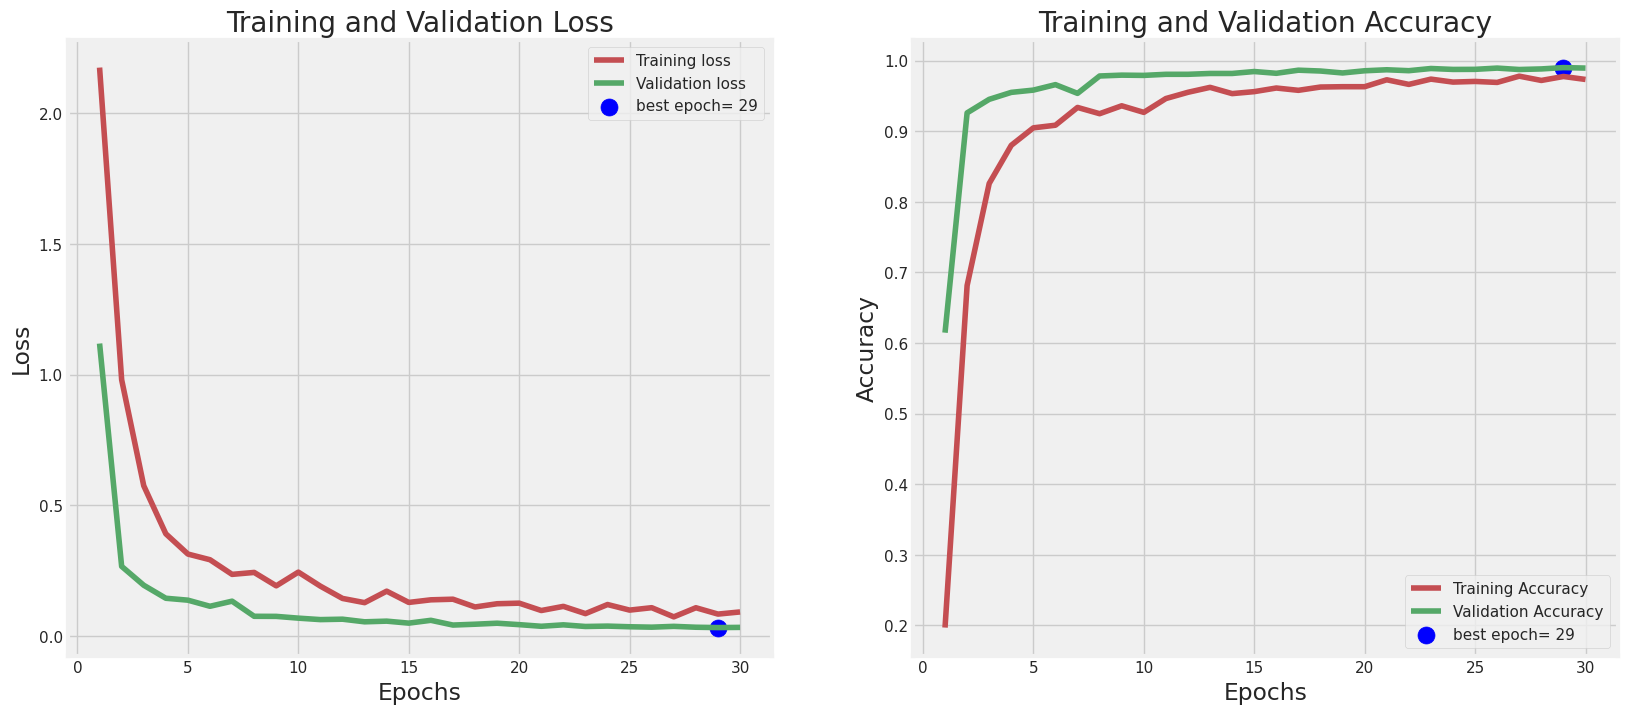

In [ ]:
# Define needed variables
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
test = pd.read_csv('/content/extracted/test.csv')
X_test = test.values.astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1)
X_test /= 255

In [ ]:
predictions = model.predict(X_test, verbose=2)

875/875 - 53s - 53s/epoch - 61ms/step
